In [1]:
# gensim modules
from gensim import utils
from gensim.models.doc2vec import LabeledSentence
from gensim.models import Doc2Vec
import gensim.models.doc2vec

#numpy
import numpy as np

#classifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#random
import random as rd

import multiprocessing


C:\Anaconda\lib\site-packages\gensim\utils.py:862: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


# Feeding data to Doc2Vec

In [2]:
cores = multiprocessing.cpu_count()

assert gensim.models.doc2vec.FAST_VERSION > -1
                    
def labeledLineSentence(src):
    sentences = []
    for key, value in src.items():
        with utils.smart_open("./Dataset/Doc2Vec/" + key) as file:
            for line_num, line in enumerate(file):
                sentences.append(LabeledSentence(utils.to_unicode(line).split(), [value + '_%s' % line_num]))
    return sentences
    

In [3]:
sources = {'test-neg.txt':'TEST_NEG', 'test-pos.txt':'TEST_POS', 'train-neg.txt':'TRAIN_NEG', 'train-pos.txt':'TRAIN_POS'}          
sentences = labeledLineSentence(sources)


In [4]:
print(sentences[0])

LabeledSentence(['once', 'again', 'mr', 'costner', 'has', 'dragged', 'out', 'a', 'movie', 'for', 'far', 'longer', 'than', 'necessary', 'aside', 'from', 'the', 'terrific', 'sea', 'rescue', 'sequences', 'of', 'which', 'there', 'are', 'very', 'few', 'i', 'just', 'did', 'not', 'care', 'about', 'any', 'of', 'the', 'characters', 'most', 'of', 'us', 'have', 'ghosts', 'in', 'the', 'closet', 'and', 'costner', 's', 'character', 'are', 'realized', 'early', 'on', 'and', 'then', 'forgotten', 'until', 'much', 'later', 'by', 'which', 'time', 'i', 'did', 'not', 'care', 'the', 'character', 'we', 'should', 'really', 'care', 'about', 'is', 'a', 'very', 'cocky', 'overconfident', 'ashton', 'kutcher', 'the', 'problem', 'is', 'he', 'comes', 'off', 'as', 'kid', 'who', 'thinks', 'he', 's', 'better', 'than', 'anyone', 'else', 'around', 'him', 'and', 'shows', 'no', 'signs', 'of', 'a', 'cluttered', 'closet', 'his', 'only', 'obstacle', 'appears', 'to', 'be', 'winning', 'over', 'costner', 'finally', 'when', 'we', '

# Build Model

In [5]:
size = 100
model = Doc2Vec(min_count = 1, window = 10, size = size, sample = 1e-4, negative = 5, workers = 7)
model.build_vocab(sentences)

In [6]:
model.docvecs['TRAIN_POS_0']

array([ -2.38453178e-03,   1.90860510e-03,   1.87775330e-03,
        -4.55366168e-03,  -2.26952383e-04,   3.07140965e-03,
        -1.06032530e-03,   2.04565562e-03,  -3.12681613e-03,
        -1.38189271e-03,  -4.46624617e-04,  -4.13042400e-03,
        -2.73255212e-03,   8.00246897e-04,   2.31104298e-03,
         1.58595422e-03,  -1.28207414e-03,   1.24533079e-03,
         3.71024339e-03,  -1.33599402e-04,  -2.78958306e-03,
         4.83998097e-04,   9.58253455e-04,  -3.61548766e-04,
        -3.89931374e-03,  -4.75366972e-03,   1.12996984e-03,
        -3.93825723e-03,   4.11498453e-03,  -4.64723259e-03,
         2.11902079e-03,  -3.98703059e-03,  -8.77859187e-04,
        -4.15391661e-03,  -2.89627584e-04,  -4.74974373e-03,
         3.95990955e-03,  -2.36437912e-03,  -1.83135062e-03,
        -3.95416655e-03,  -4.95237671e-03,  -3.63501720e-03,
         3.06412997e-03,   4.28900775e-03,  -1.46749779e-03,
        -1.75904890e-03,  -3.05630092e-04,  -2.02351570e-04,
         2.29086680e-03,

# Training Doc2Vec

In [7]:
print (model.iter)

5


In [8]:
def sentences_perm(sentences):
    shuffled = list(sentences)
    rd.shuffle(shuffled)
    return shuffled

In [9]:
model.train(sentences_perm(sentences),total_examples=model.corpus_count, epochs=model.iter)

29083359

In [10]:
model.save('./imdb_dm.d2v')

In [11]:
model = Doc2Vec.load('./imdb_dm.d2v')

In [12]:
model.docvecs['TRAIN_POS_0']

array([ 0.02972068, -0.00142612,  0.06047701,  0.11653691, -0.07416739,
       -0.00747727,  0.10026734, -0.0338551 , -0.07374521,  0.11026313,
       -0.03022147,  0.00205738, -0.02095778, -0.07121395, -0.10889953,
        0.06547679,  0.01062731, -0.01629876,  0.04868603,  0.02723386,
       -0.0808551 ,  0.01650382, -0.04058064,  0.0438267 ,  0.05928474,
       -0.00708922,  0.11191468,  0.00718765,  0.02790818, -0.118869  ,
       -0.08172533, -0.03285201,  0.11615658, -0.02895928, -0.00396362,
        0.11749085,  0.05435277,  0.09367941,  0.09223774,  0.15321551,
        0.04612576, -0.06986682,  0.10730395, -0.06729599, -0.03996442,
        0.02622758, -0.05126341, -0.12663378,  0.06557468,  0.03118444,
        0.02245084,  0.10784956, -0.02105859,  0.12642653, -0.02037736,
        0.0161974 ,  0.0020637 , -0.05732181,  0.02112668, -0.01095946,
       -0.06615886,  0.08718764, -0.14085419, -0.01593579, -0.03566695,
        0.03767385,  0.09797003,  0.01534426, -0.06969804,  0.06

In [13]:
train_arrays = np.zeros((25000, 100))
train_labels = np.zeros(25000)

for i in range(12500):
    prefix_train_pos = 'TRAIN_POS_' + str(i)
    prefix_train_neg = 'TRAIN_NEG_' + str(i)
    train_arrays[i] = model.docvecs[prefix_train_pos]
    train_arrays[12500 + i] = model.docvecs[prefix_train_neg]
    train_labels[i] = 1
    train_labels[12500 + i] = 0

In [14]:
test_arrays = np.zeros((25000, 100))
test_labels = np.zeros(25000)

for i in range(12500):
    prefix_test_pos = 'TEST_POS_' + str(i)
    prefix_test_neg = 'TEST_NEG_' + str(i)
    test_arrays[i] = model.docvecs[prefix_test_pos]
    test_arrays[12500 + i] = model.docvecs[prefix_test_neg]
    test_labels[i] = 1
    test_labels[12500 + i] = 0

In [15]:
print (train_labels[54])

1.0


In [16]:
classifier = LogisticRegression()
classifier.fit(train_arrays, train_labels)
y_pred = classifier.predict(test_arrays)

In [20]:
print (accuracy_score(test_labels, y_pred)*100)

83.224


# ROC Curve

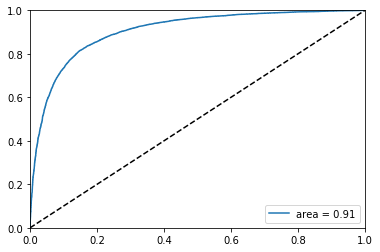

In [18]:
from sklearn.metrics import roc_curve, auc
%matplotlib inline
import matplotlib.pyplot as plt
pred_probas = classifier.predict_proba(test_arrays)[:,1]
fpr, tpr,_ = roc_curve(test_labels, pred_probas)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='area = %.2f' %roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc='lower right')
plt.show()